In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import*
from tcsim.system import *
from tcsim.gates import *
from tcsim.visualization import plot_wigner, plot_char

C:\Users\jonat\Desktop\Code\tcsim\tcsim\gates.py:111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if state.type is 'ket':
C:\Users\jonat\Desktop\Code\tcsim\tcsim\gates.py:131: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if state.type is 'ket':


In [2]:
def generate_uv_params(reps, L = 0.45):
    params = []
    for k in range(reps):
        k = k+1 # starting to count from 1
        if k == 1:
            u_k = 2**(reps-1)*np.sqrt(2)*L
        else:
            u_k = -2**(reps-k)*np.sqrt(2)*L 
        
        if k == reps:
            v_k = -np.pi/(4*np.sqrt(2)*L)
        else:
            v_k = 2.0**(-(reps-k))*np.pi/(4*np.sqrt(2)*L) 
            
        params.append(u_k)
        params.append(v_k)
      
    return params

def hastrup_three_steps(uvs):    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    return psi3

def xp_cut(state, xvec):
    W = qt.wigner(qt.ptrace(state,1),xvec,xvec)
    p_cut = W[:,int(len(xvec)/2)]
    x_cut = W[int(len(xvec)/2),:]
    return p_cut, x_cut 
    

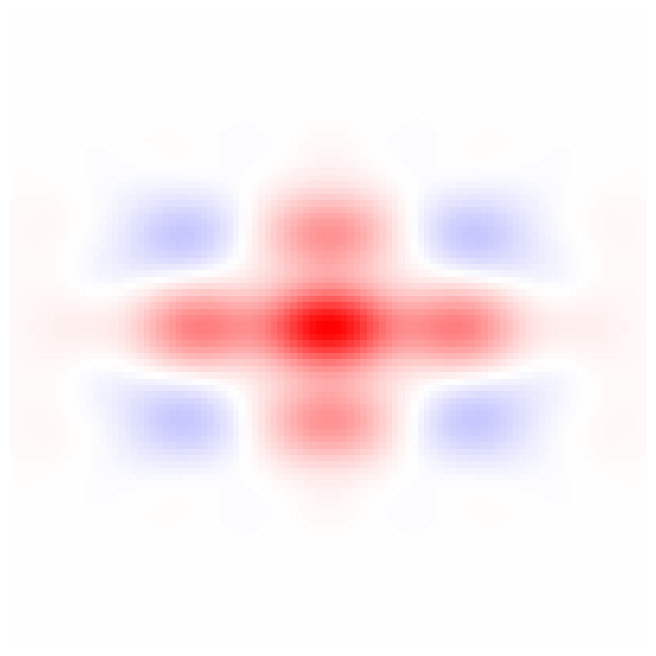

<Figure size 600x500 with 0 Axes>

In [9]:
intuitiv_params = generate_uv_params(3)
intuitiv_state = hastrup_three_steps(intuitiv_params)

fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_char(intuitiv_state, max_alpha = 5, npts = 100, ax = ax)
fig.savefig('uv_intuitiv.png', dpi=300, bbox_inches='tight')


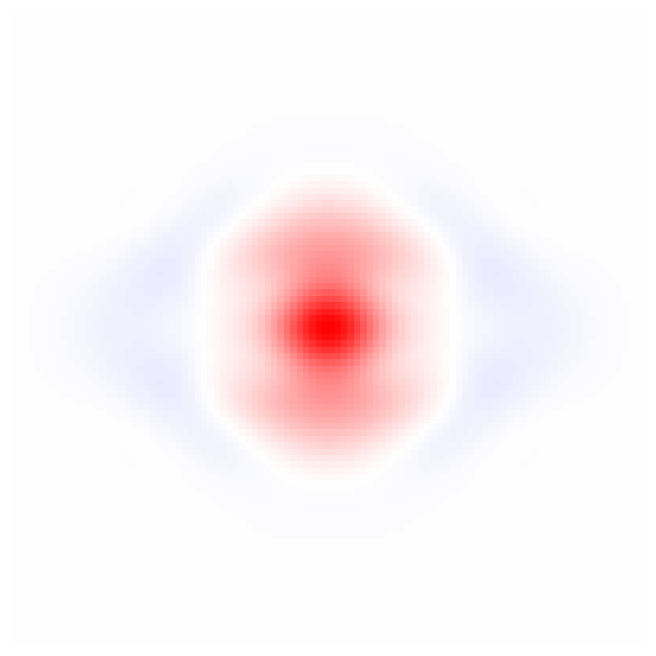

<Figure size 600x500 with 0 Axes>

In [4]:
#optimized_params = [-0.83,  -0.56,  1.3,  0.56, -1.26, -0.39] 
uvs7 = [-0.83, -0.56, 1.3, 0.56, -1.26, -0.39]
optimized_params = [1.6,  -0.39,  -0.48,  1.04, -1.11, -0.32] 
optimized_state =  hastrup_three_steps(optimized_params)
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')


plot_char(optimized_state, max_alpha = 6, npts = 100, ax = ax)
fig.savefig('uv_optimized.png', dpi=300, bbox_inches='tight')



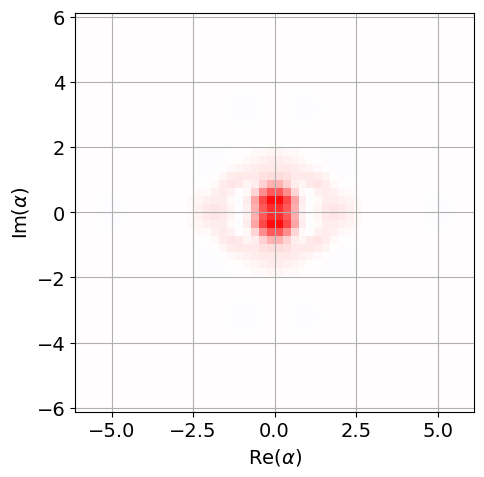

In [6]:
plot_wigner(optimized_state, max_alpha = 6, npts = 50)

In [5]:
from scipy.integrate import quad
xvec = np.linspace(-4, 4, 150)
# quad integrates over the first argument of the passed function.
def integrandx(x, y):
    return qt.wigner(qt.ptrace(psi,1), x, y)
def integrandy(y, x):
    return qt.wigner(qt.ptrace(psi,1), x, y)

-4.0 done
-3.946308724832215 done
-3.8926174496644297 done
-3.8389261744966445 done
-3.785234899328859 done
-3.7315436241610738 done
-3.6778523489932886 done
-3.6241610738255035 done
-3.5704697986577183 done
-3.5167785234899327 done
-3.4630872483221475 done
-3.4093959731543624 done
-3.3557046979865772 done
-3.302013422818792 done
-3.248322147651007 done
-3.1946308724832218 done
-3.140939597315436 done
-3.087248322147651 done
-3.033557046979866 done
-2.9798657718120802 done
-2.926174496644295 done
-2.87248322147651 done
-2.8187919463087248 done
-2.7651006711409396 done
-2.7114093959731544 done
-2.6577181208053693 done
-2.604026845637584 done
-2.550335570469799 done
-2.4966442953020134 done
-2.442953020134228 done
-2.389261744966443 done
-2.3355704697986575 done
-2.2818791946308723 done
-2.228187919463087 done
-2.174496644295302 done
-2.120805369127517 done
-2.0671140939597317 done
-2.0134228187919465 done
-1.959731543624161 done
-1.9060402684563758 done
-1.8523489932885906 done
-1.79865

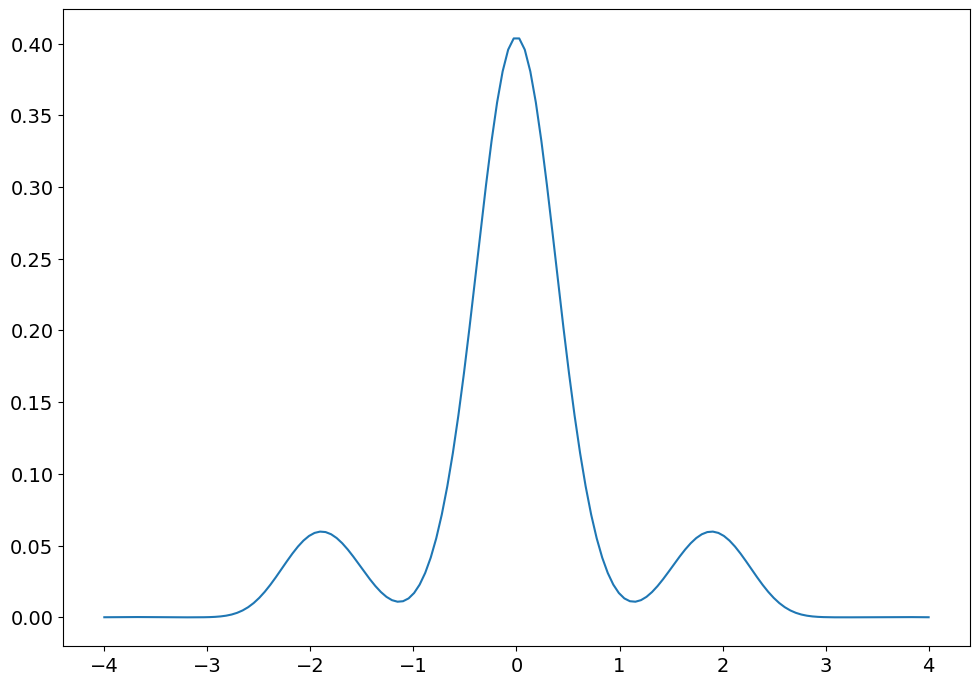

In [6]:
psi = intuitiv_state

prx_intuitiv = []
for y in xvec:
    prx_intuitiv.append(quad(integrandx, 0, 6, args=(y))[0])
    print(y, "done")
plt.plot(xvec, prx_intuitiv)


-4.0 done
-3.946308724832215 done
-3.8926174496644297 done
-3.8389261744966445 done
-3.785234899328859 done
-3.7315436241610738 done
-3.6778523489932886 done
-3.6241610738255035 done
-3.5704697986577183 done
-3.5167785234899327 done
-3.4630872483221475 done
-3.4093959731543624 done
-3.3557046979865772 done
-3.302013422818792 done
-3.248322147651007 done
-3.1946308724832218 done
-3.140939597315436 done
-3.087248322147651 done
-3.033557046979866 done
-2.9798657718120802 done
-2.926174496644295 done
-2.87248322147651 done
-2.8187919463087248 done
-2.7651006711409396 done
-2.7114093959731544 done
-2.6577181208053693 done
-2.604026845637584 done
-2.550335570469799 done
-2.4966442953020134 done
-2.442953020134228 done
-2.389261744966443 done
-2.3355704697986575 done
-2.2818791946308723 done
-2.228187919463087 done
-2.174496644295302 done
-2.120805369127517 done
-2.0671140939597317 done
-2.0134228187919465 done
-1.959731543624161 done
-1.9060402684563758 done
-1.8523489932885906 done
-1.79865

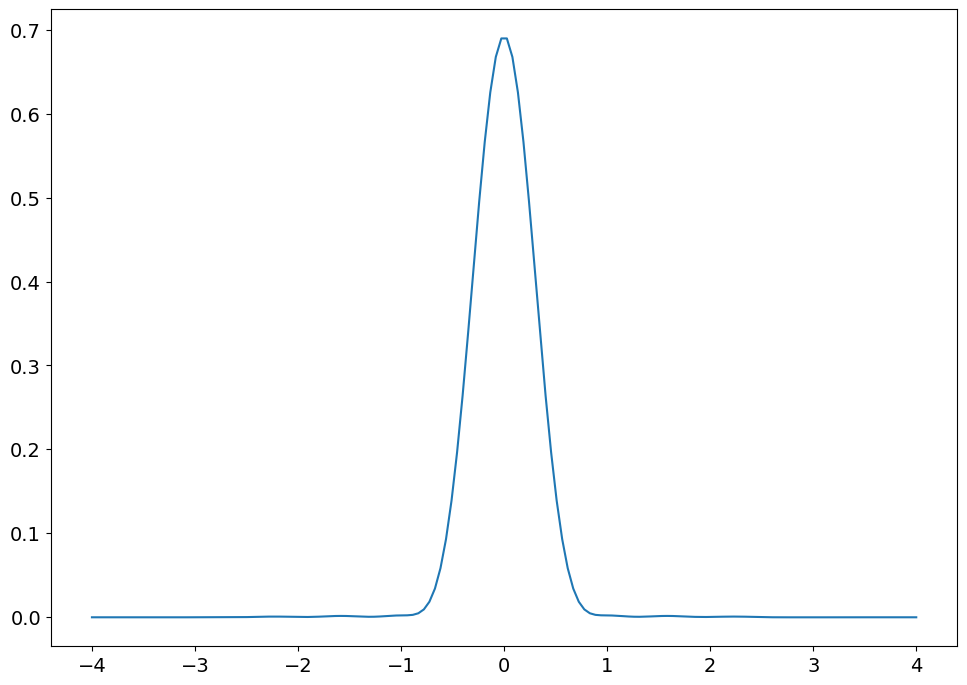

In [7]:
psi = optimized_state

prx_optimized = []
for y in xvec:
    prx_optimized.append(quad(integrandx, 0, 6, args=(y))[0])
    print(y, "done")
plt.plot(xvec, prx_optimized )


-4.0 done
-3.946308724832215 done
-3.8926174496644297 done
-3.8389261744966445 done
-3.785234899328859 done
-3.7315436241610738 done
-3.6778523489932886 done
-3.6241610738255035 done
-3.5704697986577183 done
-3.5167785234899327 done
-3.4630872483221475 done
-3.4093959731543624 done
-3.3557046979865772 done
-3.302013422818792 done
-3.248322147651007 done
-3.1946308724832218 done
-3.140939597315436 done
-3.087248322147651 done
-3.033557046979866 done
-2.9798657718120802 done
-2.926174496644295 done
-2.87248322147651 done
-2.8187919463087248 done
-2.7651006711409396 done
-2.7114093959731544 done
-2.6577181208053693 done
-2.604026845637584 done
-2.550335570469799 done
-2.4966442953020134 done
-2.442953020134228 done
-2.389261744966443 done
-2.3355704697986575 done
-2.2818791946308723 done
-2.228187919463087 done
-2.174496644295302 done
-2.120805369127517 done
-2.0671140939597317 done
-2.0134228187919465 done
-1.959731543624161 done
-1.9060402684563758 done
-1.8523489932885906 done
-1.79865

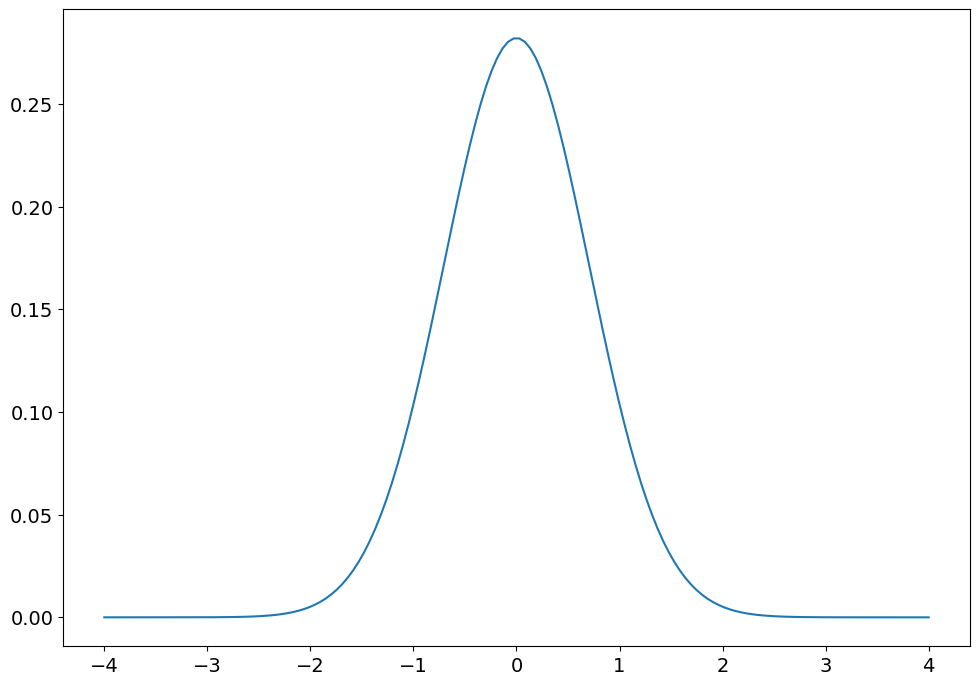

In [8]:
psi = vac

prx1 = []
for x in xvec:
    prx1.append(quad(integrandy, 0, 6, args=(x))[0])
    print(x, "done")
plt.plot(xvec, prx1 )


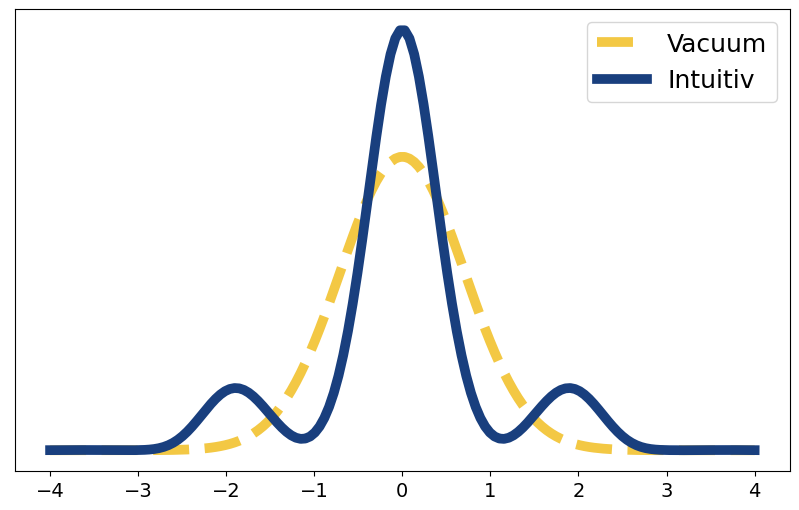

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xvec, prx1, linewidth=7.0, c = "#F3C844", linestyle = "dashed", label = "Vacuum")
ax.plot(xvec, prx_intuitiv, linewidth=7.0, c = "#193F7E", markersize = 10, label = "Intuitiv")

ax.legend(fontsize = 18)
ax.set_yticks([])
#fig.frameon=False|
fig.savefig('intuitiv.png', dpi=300, bbox_inches='tight')

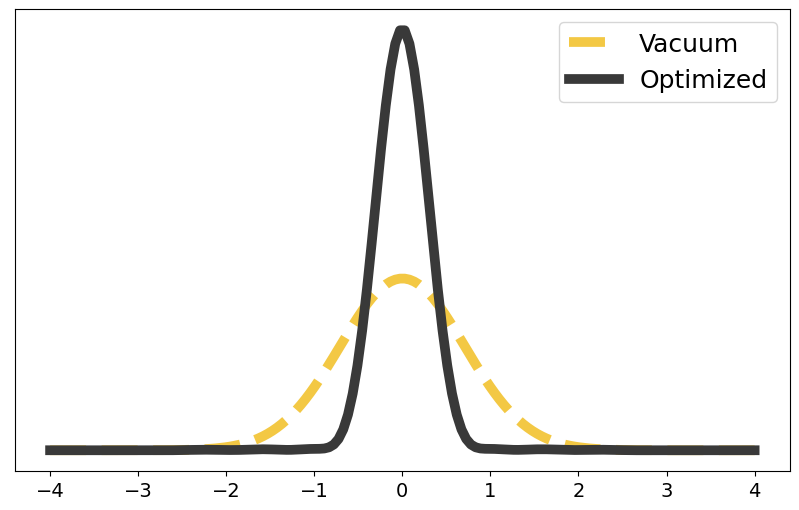

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xvec, prx1, linewidth=7.0, c = "#F3C844", linestyle = "dashed", label = "Vacuum")
ax.plot(xvec, prx_optimized, linewidth=7.0, c = "#393939", markersize = 10, label = "Optimized")

ax.legend(fontsize = 18)
ax.set_yticks([])
#fig.frameon=False|
fig.savefig('optimized.png', dpi=300, bbox_inches='tight')